In [0]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [9]:
df = pd.read_csv("shows.csv")
print(df.shape)
df.head()

(13, 5)


,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [11]:
le = LabelEncoder()
df['Nationality'] = le.fit_transform(df['Nationality'])
df['Go'] = le.fit_transform(df['Go'])
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1


In [12]:
X = df.iloc[:, :4]
y = df.iloc[:, 4]
X.head()

,Age,Experience,Rank,Nationality
0,36,10,9,1
1,42,12,4,2
2,23,4,6,0
3,52,4,4,2
4,43,21,8,2


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Go, dtype: int64

In [15]:
features = ['Age', 'Experience', 'Rank', 'Nationality']
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

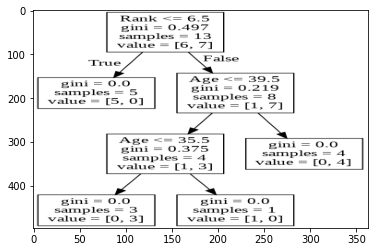

In [20]:
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img, aspect='auto')
plt.show()

In [24]:
val = dtree.predict([[40, 10, 7, 1]])
print('YES' if val==1 else 'NO')

YES
